## 1. Data Pre-processing

In [1]:
# !pip install category_encoders

In [2]:
# !pip install imbalanced-learn

In [2]:

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC, LinearSVC, NuSVC
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.metrics import accuracy_score, , log_loss
# from sklearn.metrics import classification_report,confusion_matrix, precision_recall_fscore_support 
# from sklearn.svm import SVC
# from sklearn import svm
# from sklearn.metrics import confusion_matrix
#from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import log_loss

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report,accuracy_score, log_loss,precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading the csv file
df = pd.read_csv("bank-full.csv",sep=';')

In [5]:
# The Data
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
# Checking for null values
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [7]:
# Replacing yes with 1 and no with 0

df.y = df.y.eq('yes').mul(1)
df.default = df.default.eq('no').mul(1) #NO default said yes, no =1, yes = 0
df.loan = df.loan.eq('no').mul(1) #NO loan said yes, no =1, yes = 0

df.housing = df.housing.eq('no').mul(1) #No housing said yes, no=1, yes = 0


In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,1,2143,0,1,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,1,29,0,1,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,1,2,0,0,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1,1506,0,1,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,1,1,1,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,1,825,1,1,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1,1729,1,1,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,1,5715,1,1,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,1,668,1,1,telephone,17,nov,508,4,-1,0,unknown,0


In [9]:
# Deleting the unwanted columns
# del(df['contact'])
# del(df['day'])
# del(df['month'])
# np.unique(df['housing'])

## 2. Ordinal Encoding

In [10]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['contact'],return_df=True,
                           mapping=[{'col':'contact',
'mapping':{'cellular':2, 'telephone':0, 'unknown':1}}])

In [11]:
df[['contact']] = encoder.fit_transform(df[['contact']])

In [12]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['month'],return_df=True,
                           mapping=[{'col':'month',
'mapping':{'apr':9, 'aug':11, 'dec':1, 'feb':7, 'jan':2, 'jul':10, 'jun':8, 'mar':3, 'may':12,
       'nov':6, 'oct':5, 'sep':4}}])

In [13]:
df[['month']] = encoder.fit_transform(df[['month']])

In [14]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['job'],return_df=True,
                           mapping=[{'col':'job',
'mapping':{'unemployed':5,'unknown':0,'student':6,'housemaid':1,'blue-collar':10,'technician':11,'services':7,
           'retired':8,'admin':9,'self-employed':4,'entrepreneur':3,'management':12}}])

In [15]:
df[['job']] = encoder.fit_transform(df[['job']])

In [16]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['marital'],return_df=True,
                           mapping=[{'col':'marital',
'mapping':{'single':1,'divorced':0,'married':2}}])

In [17]:
df[['marital']] = encoder.fit_transform(df[['marital']])

In [18]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['education'],return_df=True,
                           mapping=[{'col':'education',
'mapping':{'unknown':0,'primary':1,'secondary':3,'tertiary':2}}])

In [19]:
df[['education']] = encoder.fit_transform(df[['education']])

In [20]:
# Using Ordinal Encoding to convert categorical columns
encoder= ce.OrdinalEncoder(cols=['poutcome'],return_df=True,
                           mapping=[{'col':'poutcome',
'mapping':{'failure':1,'other':0,'unknown':3,'success':2}}])

In [21]:
df[['poutcome']] = encoder.fit_transform(df[['poutcome']])

In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,12.0,2,2,1,2143,0,1,1,5,12,261,1,-1,0,3,0
1,44,11.0,1,3,1,29,0,1,1,5,12,151,1,-1,0,3,0
2,33,3.0,2,3,1,2,0,0,1,5,12,76,1,-1,0,3,0
3,47,10.0,2,0,1,1506,0,1,1,5,12,92,1,-1,0,3,0
4,33,0.0,1,0,1,1,1,1,1,5,12,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,11.0,2,2,1,825,1,1,2,17,6,977,3,-1,0,3,1
45207,71,8.0,0,1,1,1729,1,1,2,17,6,456,2,-1,0,3,1
45208,72,8.0,2,3,1,5715,1,1,2,17,6,1127,5,184,3,2,1
45209,57,10.0,2,3,1,668,1,1,0,17,6,508,4,-1,0,3,0


## 3. Correlation and Heat Map

In [23]:
# Finding the correlation
corr_data = df.corr()
corr_y = corr_data["y"]
corr_y.sort_values(ascending = False)

y            1.000000
duration     0.394521
housing      0.139173
pdays        0.103621
contact      0.100822
previous     0.093236
loan         0.068185
balance      0.052838
age          0.025155
default      0.022419
job         -0.005085
education   -0.009795
day         -0.028348
marital     -0.043846
campaign    -0.073172
poutcome    -0.096257
month       -0.150419
Name: y, dtype: float64

<AxesSubplot:>

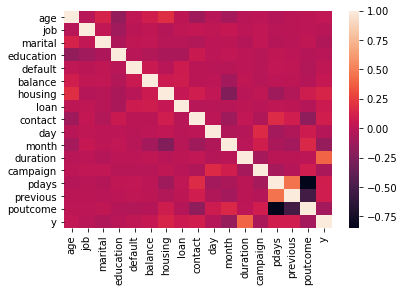

In [24]:
# Displaying the Heat Map
sns.heatmap(df.corr())

In [25]:
# new_df = df.drop(["age", "job", "default"], axis=1)
# new_df

## 4. Training and Testing the Data

In [26]:
# training the dataset
X = df.drop("y", axis=1)
y = df["y"]
# X = new_df.drop("y", axis=1)
# y = new_df["y"]

In [27]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(y), y)
class_weights

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1], y=0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([0.56624167, 4.27405937])

In [28]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [29]:
# w_y0=45211/(2*39922)
# w_y1=45211/(2*5289)
# print(f"weight 0:\t{w_y0}\nweight 1:\t{w_y1}")
# myweights = np.array([w_y0, w_y1])
# myweights

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Implimenting different models
classifiers = [
#     DecisionTreeClassifier(class_weight = "balanced"),
#     RandomForestClassifier(class_weight = "balanced"),
#     LogisticRegression(class_weight = "balanced"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier(),
    GaussianNB()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        train_predictions = clf.predict(X_train)
        acc = accuracy_score(y_train, train_predictions)
        print("Accuracy: {:.4%}".format(acc))
        print("precision_score: \n",precision_score(y_train, train_predictions))
        print("f1_score: \n",f1_score(y_train, train_predictions))
        print("confusion_matrix: \n",confusion_matrix(y_train, train_predictions))
        print("log_loss: \n",log_loss(y_train, train_predictions))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_train, train_predictions)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
precision_score: 
 1.0
f1_score: 
 1.0
confusion_matrix: 
 [[31970     0]
 [    0  4198]]
log_loss: 
 9.992007221626413e-16
RandomForestClassifier
****Results****
Accuracy: 100.0000%
precision_score: 
 1.0
f1_score: 
 1.0
confusion_matrix: 
 [[31970     0]
 [    0  4198]]
log_loss: 
 9.992007221626413e-16


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
****Results****
Accuracy: 88.8714%
precision_score: 
 0.566692367000771
f1_score: 
 0.267515923566879
confusion_matrix: 
 [[31408   562]
 [ 3463   735]]
log_loss: 
 3.84370228830102
GradientBoostingClassifier
****Results****
Accuracy: 91.0142%
precision_score: 
 0.6841491841491841
f1_score: 
 0.5200826934435911
confusion_matrix: 
 [[31157   813]
 [ 2437  1761]]
log_loss: 
 3.103618484742604
GaussianNB
****Results****
Accuracy: 84.1296%
precision_score: 
 0.35626398210290827
f1_score: 
 0.3997071742313324
confusion_matrix: 
 [[28517  3453]
 [ 2287  1911]]
log_loss: 
 5.481512317980363


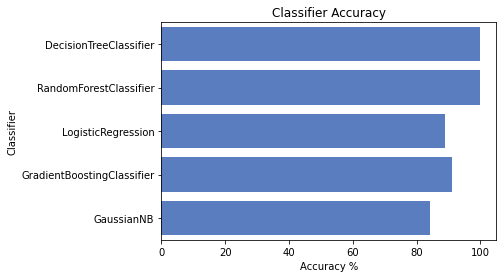

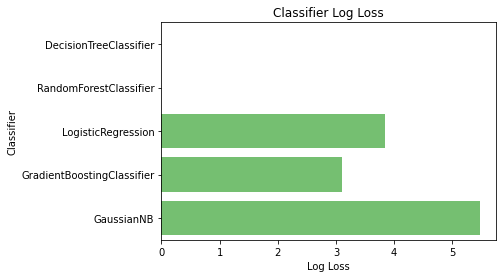

In [32]:
# Comparison between Classifier Accuracy and Log loss
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [33]:
# Testing all models
classifiers = [
#     DecisionTreeClassifier(class_weight = "balanced"),
#     RandomForestClassifier(class_weight = "balanced"),
#     LogisticRegression(class_weight = "balanced"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier(),
    GaussianNB()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        test_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, test_predictions)
        print("Accuracy: {:.4%}".format(acc))
        print("precision_score: \n",precision_score(y_test, test_predictions))
        print("f1_score: \n",f1_score(y_test, test_predictions))
        print("confusion_matrix: \n",confusion_matrix(y_test, test_predictions))
        print("log_loss: \n",log_loss(y_test, test_predictions))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_test, test_predictions)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
****Results****
Accuracy: 87.2940%
precision_score: 
 0.4739208633093525
f1_score: 
 0.47843849296413976
confusion_matrix: 
 [[7367  585]
 [ 564  527]]
log_loss: 
 4.3885349820025485
RandomForestClassifier
****Results****
Accuracy: 90.4346%
precision_score: 
 0.6596045197740112
f1_score: 
 0.519177320733741
confusion_matrix: 
 [[7711  241]
 [ 624  467]]
log_loss: 
 3.3037967803359973


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
****Results****
Accuracy: 88.4773%
precision_score: 
 0.5714285714285714
f1_score: 
 0.2733612273361227
confusion_matrix: 
 [[7805  147]
 [ 895  196]]
log_loss: 
 3.979821137268514
GradientBoostingClassifier
****Results****
Accuracy: 90.1360%
precision_score: 
 0.648729446935725
f1_score: 
 0.49318181818181817
confusion_matrix: 
 [[7717  235]
 [ 657  434]]
log_loss: 
 3.4069198772151306
GaussianNB
****Results****
Accuracy: 83.7333%
precision_score: 
 0.36151603498542273
f1_score: 
 0.40276086073893624
confusion_matrix: 
 [[7076  876]
 [ 595  496]]
log_loss: 
 5.618405454413631


## Oversampling

In [34]:
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [35]:
from pandas.core.common import random_state
# ros = RandomOverSampler()
# X_train, y_train = ros.fit_resample(X_ros, y_ros )

## Normalize data
sc_X = StandardScaler()
X_train_norm = sc_X.fit_transform(X_train)
X_test_norm = sc_X.transform(X_test)

## SMOTE only on training data
# sm = SMOTE(sampling_strategy='all')
sm = SMOTE(random_state = 42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_norm, y_train)

In [36]:
# print(Counter(y_train))

In [37]:
# training the dataset
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [38]:
# Implimenting different models SMOTE
classifiers = [
#     DecisionTreeClassifier(class_weight = "balanced"),
#     RandomForestClassifier(class_weight = "balanced"),
#     LogisticRegression(class_weight = "balanced"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier(),
    GaussianNB()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    # clf.fit(X_train, y_train)
    clf.fit(X_train_smote, y_train_smote)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        train_predictions_smote = clf.predict(X_train_smote)
        acc = accuracy_score(y_train_smote, train_predictions_smote)
        print("Accuracy: {:.4%}".format(acc))
        print("precision_score: \n",precision_score(y_train_smote, train_predictions_smote))
        print("f1_score: \n",f1_score(y_train_smote, train_predictions_smote))
        print("confusion_matrix: \n",confusion_matrix(y_train_smote, train_predictions_smote))
        print("log_loss: \n",log_loss(y_train_smote, train_predictions_smote))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_train_smote, train_predictions_smote)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
precision_score: 
 1.0
f1_score: 
 1.0
confusion_matrix: 
 [[31970     0]
 [    0 31970]]
log_loss: 
 9.99200722162641e-16
RandomForestClassifier
****Results****
Accuracy: 100.0000%
precision_score: 
 1.0
f1_score: 
 1.0
confusion_matrix: 
 [[31970     0]
 [    0 31970]]
log_loss: 
 9.99200722162641e-16
LogisticRegression
****Results****
Accuracy: 80.5380%
precision_score: 
 0.8074766943814563
f1_score: 
 0.804714227425379
confusion_matrix: 
 [[25857  6113]
 [ 6331 25639]]
log_loss: 
 6.722011595204243
GradientBoostingClassifier
****Results****
Accuracy: 91.8502%
precision_score: 
 0.9032763661572776
f1_score: 
 0.9200116659247547
confusion_matrix: 
 [[28761  3209]
 [ 2002 29968]]
log_loss: 
 2.814890986894481
GaussianNB
****Results****
Accuracy: 76.3716%
precision_score: 
 0.7235746486343145
f1_score: 
 0.7831802525832378
confusion_matrix: 
 [[21546 10424]
 [ 4684 27286]]
log_loss: 
 8.161091160117657


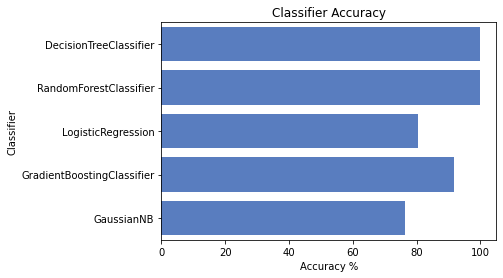

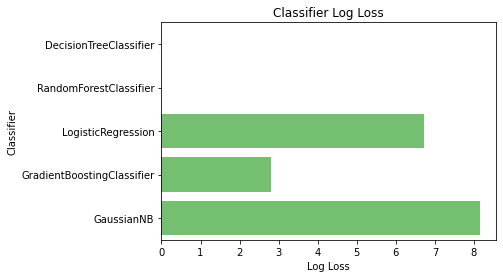

In [39]:
# Comparison between Classifier Accuracy and Accuracy Percentage 
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [40]:
# Testing all models SMOTE
classifiers = [
#     DecisionTreeClassifier(class_weight = "balanced"),
#     RandomForestClassifier(class_weight = "balanced"),
#     LogisticRegression(class_weight = "balanced"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier(),
    GaussianNB()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_smote, y_train_smote)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        test_predictions_smote = clf.predict(X_test_norm)
        acc = accuracy_score(y_test, test_predictions_smote)
        print("Accuracy: {:.4%}".format(acc))
        print("precision_score: \n",precision_score(y_test, test_predictions_smote))
        print("f1_score: \n",f1_score(y_test, test_predictions_smote))
        print("confusion_matrix: \n",confusion_matrix(y_test, test_predictions_smote))
        print("log_loss: \n",log_loss(y_test, test_predictions_smote))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_test, test_predictions_smote)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)

print("="*30)

DecisionTreeClassifier
****Results****
Accuracy: 86.0776%
precision_score: 
 0.4370314842578711
f1_score: 
 0.4808247422680412
confusion_matrix: 
 [[7201  751]
 [ 508  583]]
log_loss: 
 4.8086829568575284
RandomForestClassifier
****Results****
Accuracy: 89.4615%
precision_score: 
 0.5566502463054187
f1_score: 
 0.5872672152446947
confusion_matrix: 
 [[7412  540]
 [ 413  678]]
log_loss: 
 3.639929855906468
LogisticRegression
****Results****
Accuracy: 80.2389%
precision_score: 
 0.35512073272273104
f1_score: 
 0.48840538219295737
confusion_matrix: 
 [[6403 1549]
 [ 238  853]]
log_loss: 
 6.825393342267474
GradientBoostingClassifier
****Results****
Accuracy: 87.7585%
precision_score: 
 0.49510403916768664
f1_score: 
 0.5937614678899081
confusion_matrix: 
 [[7127  825]
 [ 282  809]]
log_loss: 
 4.228141671684843
GaussianNB
****Results****
Accuracy: 69.0368%
precision_score: 
 0.25882020886254586
f1_score: 
 0.3957703927492447
confusion_matrix: 
 [[5326 2626]
 [ 174  917]]
log_loss: 
 10.69

## Hyperparameter Tuning

In [41]:
def met(model,X_train1,y_train1,X_test1,y_test1):
  model.fit(X_train1,y_train1)

  print('................Train .......................')

  y_train_pred=model.predict(X_train1)
  print(confusion_matrix(y_train1, y_train_pred), ": is the confusion matrix")
  print(accuracy_score(y_train1, y_train_pred), ": is the accuracy score")
  print(precision_score(y_train1, y_train_pred), ": is the precision score")
  print(f1_score(y_train1, y_train_pred), ": is the f1 score")
  print(roc_auc_score(y_train1, y_train_pred), ": is the roc auc score")
  print(log_loss(y_train1, y_train_pred), ": is the logloss")

  print('................Test.......................')

  y_pred=model.predict(X_test1)
  print(confusion_matrix(y_test1, y_pred), ": is the confusion matrix")
  print(accuracy_score(y_test1, y_pred), ": is the accuracy score")
  print(precision_score(y_test1, y_pred), ": is the precision score")
  print(f1_score(y_test1, y_pred), ": is the f1 score")
  print(roc_auc_score(y_test1, y_pred), ": is the roc auc score")
  print(log_loss(y_test1, y_pred), ": is the logloss")

### 1. Decision Tree

In [65]:
param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range (1,10),
    "min_samples_split":range (1,10),
    "min_samples_leaf":range (1,5)
}

#After grid search on SMOTE train data
# {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [66]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(class_weight = "balanced"),
                    param_grid=param_dict,
                    cv = 5 ,
                    verbose = 1 ,
                    scoring = 'f1',
                    n_jobs=-1)

grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\kondr\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.75790633 0.75790633 0.75790633 0.75790633 0.75790633
 0.75790633 0.75790633 0.75790633        nan 0.75790633 0.75790633
 0.75790633 0.75790633 0.75790633 0.75790633 0.75790633 0.75790633
        nan 0.75790633 0.75790633 0.75790633 0.75790633 0.75790633
 0.75790633 0.75790633 0.75790633        nan 0.75790633 0.75790633
 0.75790633 0.75790633 0.75790633 0.75790633 0.75790633 0.75790633
        nan 0.77899345 0.77899345 0.77899345 0.77899345 0.77899345
 0.77899345 0.77899345 0.77899345        nan 0.77899345 0.77899345
 0.77899345 0.77899345 0.77899345 0.77899345 0.77899345 0.77899345
        nan 0.77899345 0.77899345 0.77899345 0.77899345 0.77899345
 0.77899345 0.77899345 0.77899345        nan 0.77899345 0.77899345
 0.77899345 0.77899345 0.77899345 0.77899345 0.77899345 0.77899345
        nan 0.81063472 0.81063472 0.81063472 0.810634

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='f1', verbose=1)

In [43]:
print('Best Params: ', grid.best_params_)

Best Params:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [44]:
print('Best Score: ', grid.best_score_)

Best Score:  0.8760622265962293


In [41]:
model = DecisionTreeClassifier(criterion= 'gini',
                               max_depth= 9,
                               min_samples_leaf= 1,
                               min_samples_split= 4,
                               class_weight = "balanced"
                              )

In [42]:
met(model, X_train_smote, y_train_smote, X_test_norm, y_test)

................Train .......................
[[28288  3682]
 [ 3784 28186]] : is the confusion matrix
0.8832342821395058 : is the accuracy score
0.8844609012175223 : is the precision score
0.8830477145273975 : is the f1 score
0.8832342821395056 : is the roc auc score
4.0329910647816885 : is the logloss
................Test.......................
[[6933 1019]
 [ 288  803]] : is the confusion matrix
0.85546831803605 : is the accuracy score
0.4407244785949506 : is the precision score
0.5513216615173361 : is the f1 score
0.8039390674938725 : is the roc auc score
4.992037547045188 : is the logloss


### 2. Random Forest

In [42]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [3],
    'min_samples_leaf': [3,4,5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}
# Create a based model
rf = RandomForestClassifier(class_weight = "balanced")
# Instantiate the grid search model
grid = GridSearchCV(estimator = rf,
                           param_grid = param_grid, 
                           cv = 5,
                           scoring = 'f1',
                           n_jobs = -1, 
                           verbose = 1)

In [43]:
grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [3], 'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             scoring='f1', verbose=1)

In [44]:
print('Best Score: ', grid.best_score_)

Best Score:  0.9305702147956374


In [45]:
print('Best Params: ', grid.best_params_)

Best Params:  {'bootstrap': True, 'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1350}


In [55]:
rfc = RandomForestClassifier(bootstrap = True,
                               max_depth = 15,
                               max_features = 4, 
                               min_samples_leaf = 3, 
                               min_samples_split = 3, 
                               n_estimators = 1500,
                            class_weight = "balanced")

In [56]:
# rfc.fit(X_train_smote, y_train_smote)
# y_pred=rfc.predict(X_test_norm)

In [57]:
met(rfc, X_train_smote, y_train_smote, X_test_norm, y_test)

................Train .......................
[[30175  1795]
 [  514 31456]] : is the confusion matrix
0.9638880200187676 : is the accuracy score
0.946016661153048 : is the precision score
0.9645972922831604 : is the f1 score
0.9638880200187676 : is the roc auc score
1.2472860490027526 : is the logloss
................Test.......................
[[7185  767]
 [ 276  815]] : is the confusion matrix
0.884662169633971 : is the accuracy score
0.5151706700379267 : is the precision score
0.609801720912832 : is the f1 score
0.8252836796212656 : is the roc auc score
3.9836953523300687 : is the logloss


,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
72809,27,4.0,2,1,0,416,1,0,1193,2,-1,0,2
71061,32,11.0,0,3,0,2016,0,0,232,1,348,1,3
57176,39,4.0,1,1,0,1317,1,0,543,1,170,4,1
40165,35,11.0,2,3,0,697,0,0,57,2,304,1,0
71998,45,11.0,0,3,0,2067,1,0,393,2,462,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68683,63,7.0,1,1,0,109,0,0,406,2,-1,0,2
39543,52,0.0,2,2,0,5091,0,0,309,1,-1,0,2
32278,51,4.0,2,2,0,2964,1,0,177,1,-1,0,2
65269,54,0.0,0,2,0,380,0,0,696,2,-1,0,2


### 3. Logistic Regression

In [58]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
#                   class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=LogisticRegression(class_weight = "balanced"),
                    param_grid=param_grid,
                    scoring='f1',
                    verbose=1,
                    n_jobs=-1)

In [59]:
grid = grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [60]:
print('Best Score: ', grid.best_score_)

Best Score:  0.8146796399164133


In [61]:
print('Best Params: ', grid.best_params_)

Best Params:  {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}


In [64]:
# model = LogisticRegression(C=10,class_weight={1: 0.7, 0: 0.3},penalty='l1',solver='liblinear')
model = LogisticRegression(C=0.0001, class_weight="balanced", penalty='l2', solver='liblinear')

In [63]:
# model.fit(X_train1,y_train1)
# y_pred=model.predict(X_test1)

In [65]:
met(model, X_train_smote, y_train_smote, X_test_norm, y_test)

................Train .......................
[[25857  6113]
 [ 6331 25639]] : is the confusion matrix
0.8053800437910541 : is the accuracy score
0.8074766943814563 : is the precision score
0.804714227425379 : is the f1 score
0.8053800437910541 : is the roc auc score
6.722011595204243 : is the logloss
................Test.......................
[[6403 1549]
 [ 238  853]] : is the confusion matrix
0.8023885878580117 : is the accuracy score
0.35512073272273104 : is the precision score
0.48840538219295737 : is the f1 score
0.793528874899258 : is the roc auc score
6.825393342267474 : is the logloss


### 4. XGboost

In [68]:
from xgboost import XGBClassifier
estimator = XGBClassifier(
    objective= 'binary:logistic',
    njob = -1,
    cv = 5,
    scoring = 'f1',
    seed=42,
    scale_pos_weight=7.5481
)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


In [ ]:
#     scale_pos_weight=2.7473

In [71]:
!pip install libomp

ERROR: Could not find a version that satisfies the requirement libomp
ERROR: No matching distribution found for libomp


In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
    
}

In [ ]:
grid = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    verbose=True
)

In [ ]:
grid.fit(X_train_smote, y_train_smote)

In [ ]:
print('Best Score: ', grid.best_score_)

In [ ]:
print('Best Params: ', grid_result.best_params_)

In [ ]:
grid_search.best_estimator_

In [ ]:
model = XGBClassifier(cv=5, max_depth=4, n_estimators=180, njob=-1, scoring='roc_auc',
              seed=42)
model.fit(X_train_smote, y_train_smote)

In [ ]:
met(model, X_train_smote, y_train_smote, X_test_norm, y_test)

### 5. Naive Bayes

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(),
                            param_grid=param_grid_nb, 
                            scoring = 'f1',
                            verbose=1, 
                            cv=5, 
                            n_jobs=-1)

In [ ]:
nbModel_grid.fit(X_train_smote, y_train_smote)

In [ ]:
print(nbModel_grid.best_estimator_)

In [ ]:
print('Best Score: ', nbModel_grid.best_score_)

In [ ]:
print('Best Params: ', nbModel_grid.best_params_)

In [ ]:
model = GaussianNB(var_smoothing=0.002848035868435802)

In [ ]:
# model.fit(X_train1,y_train1)
# y_pred=model.predict(X_test1)

In [ ]:
met(model, X_train_smote, y_train_smote, X_test_norm, y_test)

## Hyperparameter Metrics :


In [ ]:
# Implimenting different models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

classifiers = [
    DecisionTreeClassifier(criterion = 'gini',
                               max_depth = 9,
                               min_samples_leaf = 1,
                               min_samples_split = 2),
    RandomForestClassifier(bootstrap = True,
                               max_depth = 15,
                               max_features = 4, 
                               min_samples_leaf = 4, 
                               min_samples_split = 4, 
                               n_estimators = 1300),
    XGBClassifier(cv=5, max_depth=4, n_estimators=180, njob=-1, scoring='roc_auc',
              seed=42),
    LogisticRegression(C=10,class_weight={1: 0.7, 0: 0.3},penalty='l1',solver='liblinear'),
    GaussianNB(var_smoothing=0.002848035868435802)]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        train_predictions = clf.predict(X_train)
        acc = accuracy_score(y_train, train_predictions)
        print("Accuracy: {:.4%}".format(acc))
        print("precision_score: \n",precision_score(y_train, train_predictions))
        print("f1_score: \n",f1_score(y_train, train_predictions))
        print("confusion_matrix: \n",confusion_matrix(y_train, train_predictions))
        print("log_loss: \n",log_loss(y_train, train_predictions))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_train, train_predictions)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
****Results****
Accuracy: 83.8552%
precision_score: 
 0.8154343834698219
f1_score: 
 0.8442587088695442
confusion_matrix: 
 [[25637  6333]
 [ 3990 27980]]
log_loss: 
 5.576303606118055
RandomForestClassifier
****Results****
Accuracy: 93.2468%
precision_score: 
 0.9067666960870845
f1_score: 
 0.9345360824742269
confusion_matrix: 
 [[28801  3169]
 [ 1149 30821]]
log_loss: 
 2.3325143947056715
XGBClassifier
****Results****
Accuracy: 84.7826%
precision_score: 
 0.8342551400745462
f1_score: 
 0.8508537968668567
confusion_matrix: 
 [[26456  5514]
 [ 4216 27754]]
log_loss: 
 5.255969710708649
LogisticRegression
****Results****
Accuracy: 77.8730%
precision_score: 
 0.7186533837169358
f1_score: 
 0.8054562455310489
confusion_matrix: 
 [[20504 11466]
 [ 2682 29288]]
log_loss: 
 7.642536387540366
GaussianNB
****Results****
Accuracy: 67.2881%
precision_score: 
 0.8266548463356974
f1_score: 
 0.5721824503988545
confusion_matrix: 
 [[29037  2933]
 [17983 13987]]
log_loss: 
 11

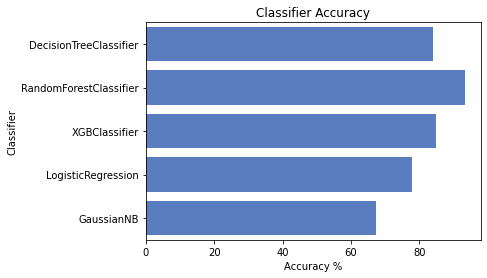

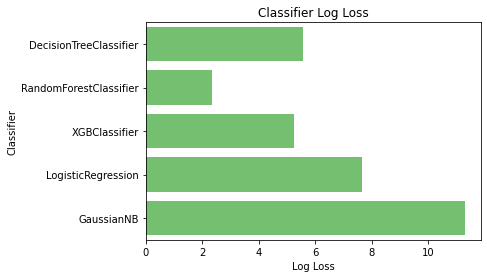

In [ ]:
# Comparison between Classifier Accuracy and Accuracy Percentage 
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [ ]:
# Implimenting different models
classifiers = [
    DecisionTreeClassifier(criterion = 'gini',
                               max_depth = 9,
                               min_samples_leaf = 1,
                               min_samples_split = 2),
    RandomForestClassifier(bootstrap = True,
                               max_depth = 15,
                               max_features = 4, 
                               min_samples_leaf = 4, 
                               min_samples_split = 4, 
                               n_estimators = 1300),
    XGBClassifier(cv=5, max_depth=4, n_estimators=180, njob=-1, scoring='roc_auc',
              seed=42),
    LogisticRegression(C=10,class_weight={1: 0.7, 0: 0.3},penalty='l1',solver='liblinear'),
    GaussianNB(var_smoothing=0.002848035868435802)]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        print("Accuracy: {:.4%}".format(acc))
        print("precision_score: \n",precision_score(y_test, train_predictions))
        print("f1_score: \n",f1_score(y_test, train_predictions))
        print("confusion_matrix: \n",confusion_matrix(y_test, train_predictions))
        print("log_loss: \n",log_loss(y_test, train_predictions))
        log_entry = pd.DataFrame([[name, acc*100, log_loss(y_test, train_predictions)]], columns=log_cols)
        log = log.append(log_entry)
    except Exception as e:
        print (e)
    
print("="*30)

DecisionTreeClassifier
****Results****
Accuracy: 78.6022%
precision_score: 
 0.3361801242236025
f1_score: 
 0.4723206981183529
confusion_matrix: 
 [[6242 1710]
 [ 225  866]]
log_loss: 
 7.3906778321085715
RandomForestClassifier
****Results****
Accuracy: 85.2704%
precision_score: 
 0.43627710206240083
f1_score: 
 0.5533199195171027
confusion_matrix: 
 [[6886 1066]
 [ 266  825]]
log_loss: 
 5.087526543058899
XGBClassifier
****Results****
Accuracy: 81.9308%
precision_score: 
 0.38392475416844807
f1_score: 
 0.5236151603498542
confusion_matrix: 
 [[6511 1441]
 [ 193  898]]
log_loss: 
 6.241016570737695
LogisticRegression
****Results****
Accuracy: 66.3607%
precision_score: 
 0.2537238071194143
f1_score: 
 0.3978622327790973
confusion_matrix: 
 [[4996 2956]
 [  86 1005]]
log_loss: 
 11.618856729328979
GaussianNB
****Results****
Accuracy: 84.9386%
precision_score: 
 0.3927157561361837
f1_score: 
 0.42141036533559895
confusion_matrix: 
 [[7185  767]
 [ 595  496]]
log_loss: 
 5.202081913203285


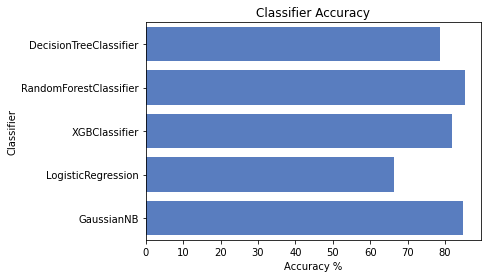

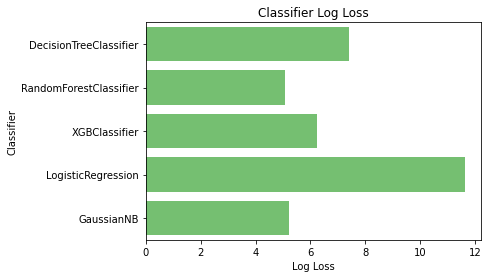

In [ ]:
# Comparison between Classifier Accuracy and Accuracy Percentage 
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

# HTML

In [ ]:
del(X_train1['job'])
del(X_train1['marital'])
del(X_train1['education'])
del(X_train1['default'])
del(X_train1['housing'])
del(X_train1['campaign'])
del(X_train1['pdays'])
del(X_train1['previous'])
del(X_train1['loan'])

In [ ]:
del(X_test1['job'])
del(X_test1['marital'])
del(X_test1['education'])
del(X_test1['default'])
del(X_test1['housing'])
del(X_test1['campaign'])
del(X_test1['pdays'])
del(X_test1['previous'])
del(X_test1['loan'])

In [ ]:
y_predict= rfc.predict(X_test1)

In [ ]:
# Using pickle to link with the html page
import pickle
pickle.dump(rfc,open('output.pkl','wb'))
model=pickle.load(open('output.pkl','rb'))

# THE END

## 5. HTML Page

The below html page can take values like:
1. "age" : Any values

2. "job" : {
            'unemployed'    :0,
            'unknown'       :1,
            'student'       :2,
            'housemaid'     :3,
            'blue-collar'   :4,
            'technician'    :5,
            'services'      :6,
            'retired'       :7,
            'admin'         :8,
            'self-employed' :9,
            'entrepreneur'  :10,
            'management'    :11
           } 
            
3. "marital": {
               'single'   :0,
               'divorced' :1,
               'married'  :2
              }
               
4. "education" : {
                  'unknown'   :0,
                  'primary'   :1,
                  'secondary' :2,
                  'tertiary'  :3
                 }
                  
5. "default" : { 
                 'yes' : 1,
                 'no'  : 0
               }
                 
6. "balance" : Any Values

7. "housing" : { 
                 'yes' : 1,
                 'no'  : 0
               }
               
8. "loan" : { 
                 'yes' : 1,
                 'no'  : 0
            }
   
9. "duration" : Any values (in sec)

10. "campaign" : Any value

11. "pdays" : Any value

12. "previous" : Any value

13. "poutcome" : {
                   'failure'  :0,
                   'other'    :1,
                   'unknown'  :2,
                   'success'  :3
                   
                  } 	

In [ ]:
from IPython.display import Image
Image("Desktop/2.png")

In [ ]:
from IPython.display import Image
Image("Desktop/1.png")

In [ ]:
from IPython.display import Image
Image("Desktop/0.png")